In [2]:
%matplotlib inline
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
train = pd.read_csv('src/train.csv')

In [13]:
train.drop("Id", axis=1, inplace=True)

# Data Exploration

In [14]:
train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 80 entries, MSSubClass to SalePrice
dtypes: float64(4), int64(33), object(43)
memory usage: 912.6+ KB


## Let´s start analysing the target

In [15]:
train['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

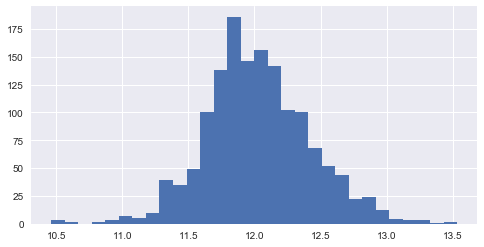

In [16]:
train['SalePrice'].hist(bins=30).plot()
plt.show()

The distribution is right skewed. Usually a log transformation is sufficient to transform this in a normal distribution. To clarify a bit more, we will follow with a Probability Plot

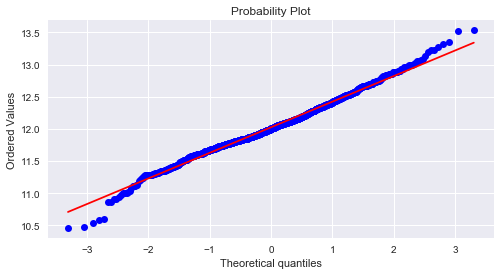

In [17]:
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Although earlier we verified that there is no price that is either negative or zero, we could continue with a simple log transformation, but we will use a log(1+x) to make the solution safer

In [18]:
train["SalePrice"] = np.log1p(train["SalePrice"])
# It's important to remember that log(1 + x), the inverse of expm1.

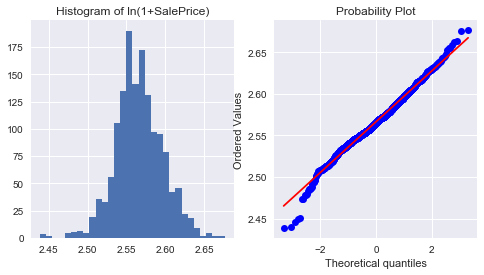

In [19]:
sns.set(rc={'figure.figsize':(8,4)})
plt.subplot(1, 2, 1)
train['SalePrice'].hist(bins=30).plot()
plt.title("Histogram of ln(1+SalePrice)")
plt.subplot(1, 2, 2)
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

As we can see above, after the transformation the target is almost normal

## Nos it's time to look a bit closer on correlations

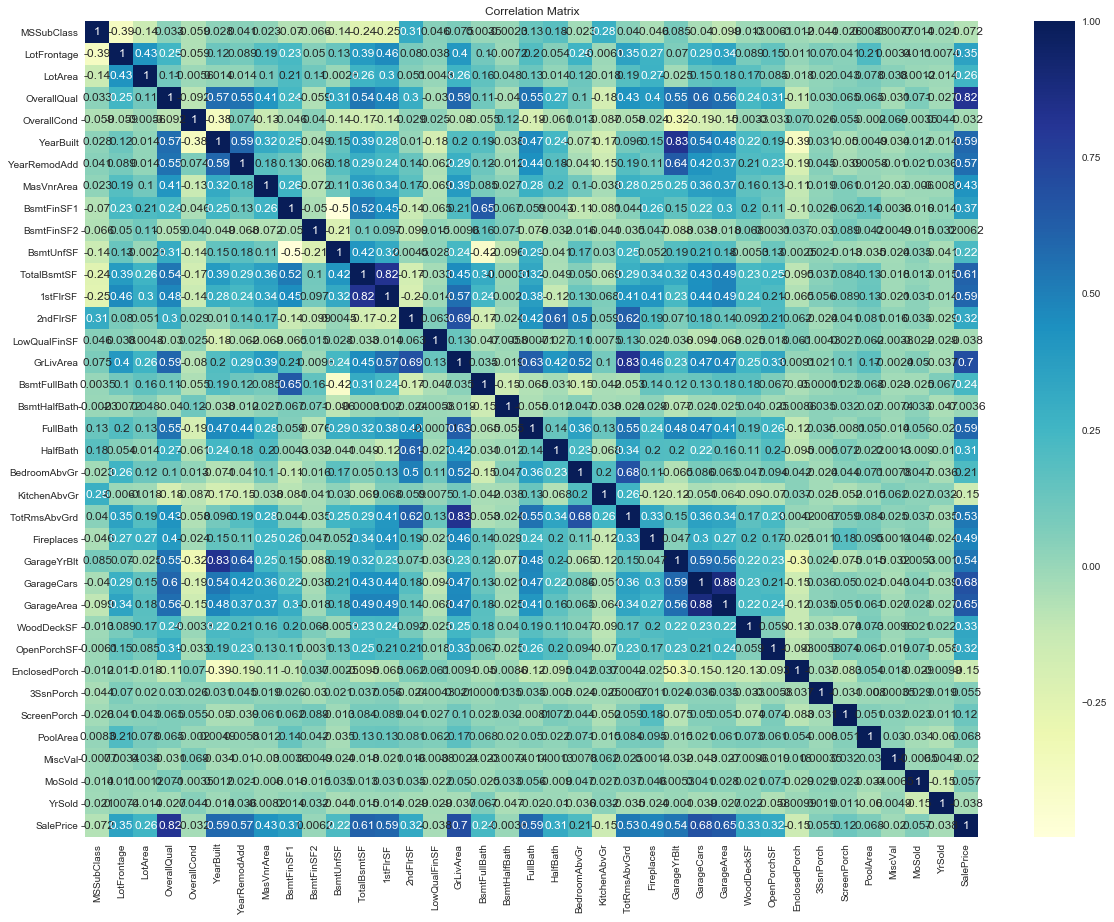

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Matrix")
plt.show()

The correlation plot above was created only to have an idea of correlation between variables. Although we have some interesting correlations that needs to be investigated deeper, at this moment we will focus the investigation on the variables that are highly correlated with the SalesPrice.
* OverallQual
* TotalBsmtSF
* GrLivArea
* GarageCars

In [21]:
temp = train.loc[:,['OverallQual','TotalBsmtSF','GrLivArea','GarageCars', 'SalePrice']]

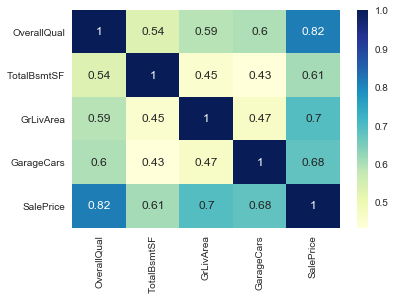

In [25]:
plt.subplots(figsize=(6,4))
sns.heatmap(temp.corr(), cmap="YlGnBu", annot=True)
plt.show()

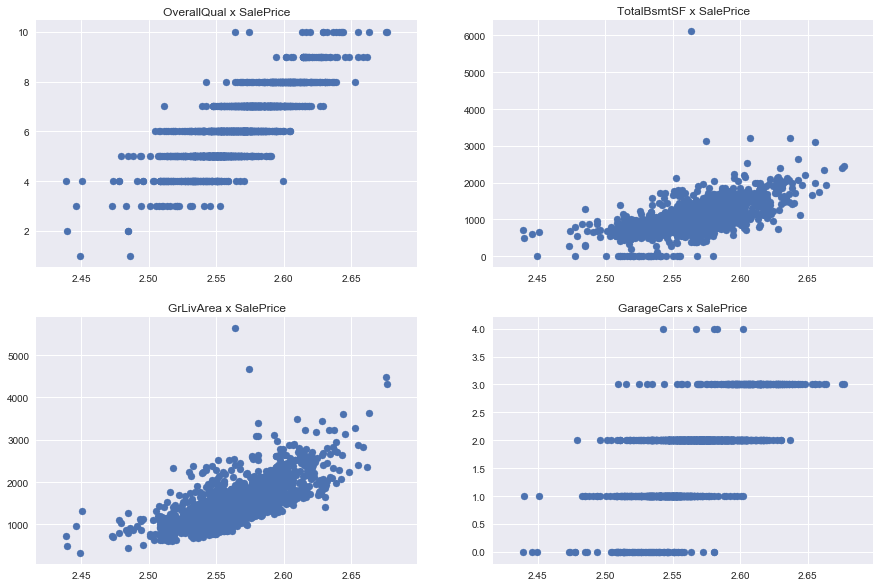

In [28]:
colunas = list(temp.columns)
colunas.remove('SalePrice')

plt.subplots(figsize=(15,10))
for n, coluna in enumerate(colunas):
    plt.subplot(2,2,n+1)
    plt.title(coluna + " x SalePrice")
    plt.scatter(x=temp['SalePrice'], y=temp[coluna])
    
plt.show()

Let's take a look at nulls

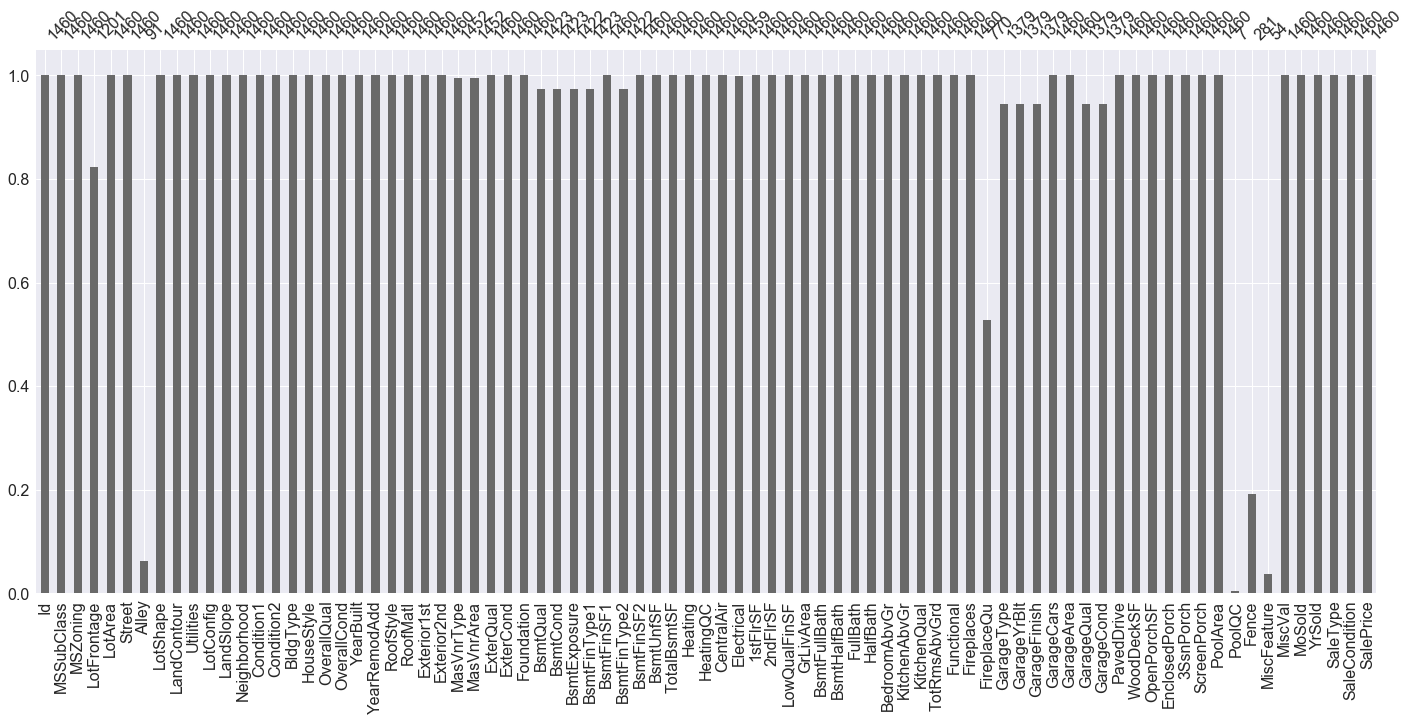

In [5]:
msno.bar(train)

According to the data_description file, some nulls makes sense. They will be investigated later

Although we have houses costing more than 700000, there is a concentration of houses with prices below 200000

Looking a bit closer we can see that GarageCars and GarageArea have 0.88 correlation and this is too high. GarageCars is more correlated with SalePrice than GarageArea, so maybe it's a better predictor for SalePrice. The same occurs with TotalBsmtSF and 1stFlrSF

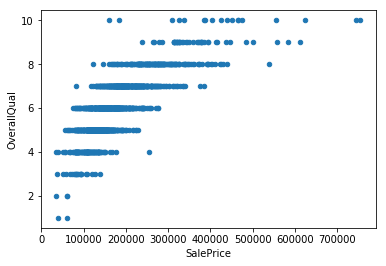

In [41]:
temp.plot(kind='scatter', x='SalePrice', y='OverallQual')

TypeError: 'str' object is not callable

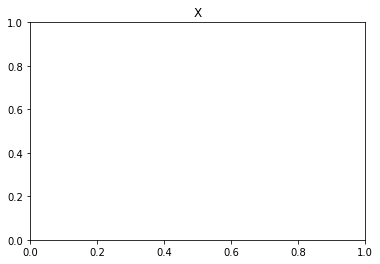

In [46]:
plt.title("X")
plt.xlabel("ASda")
plt.scatter(x=temp['SalePrice'], y=temp['OverallQual'])

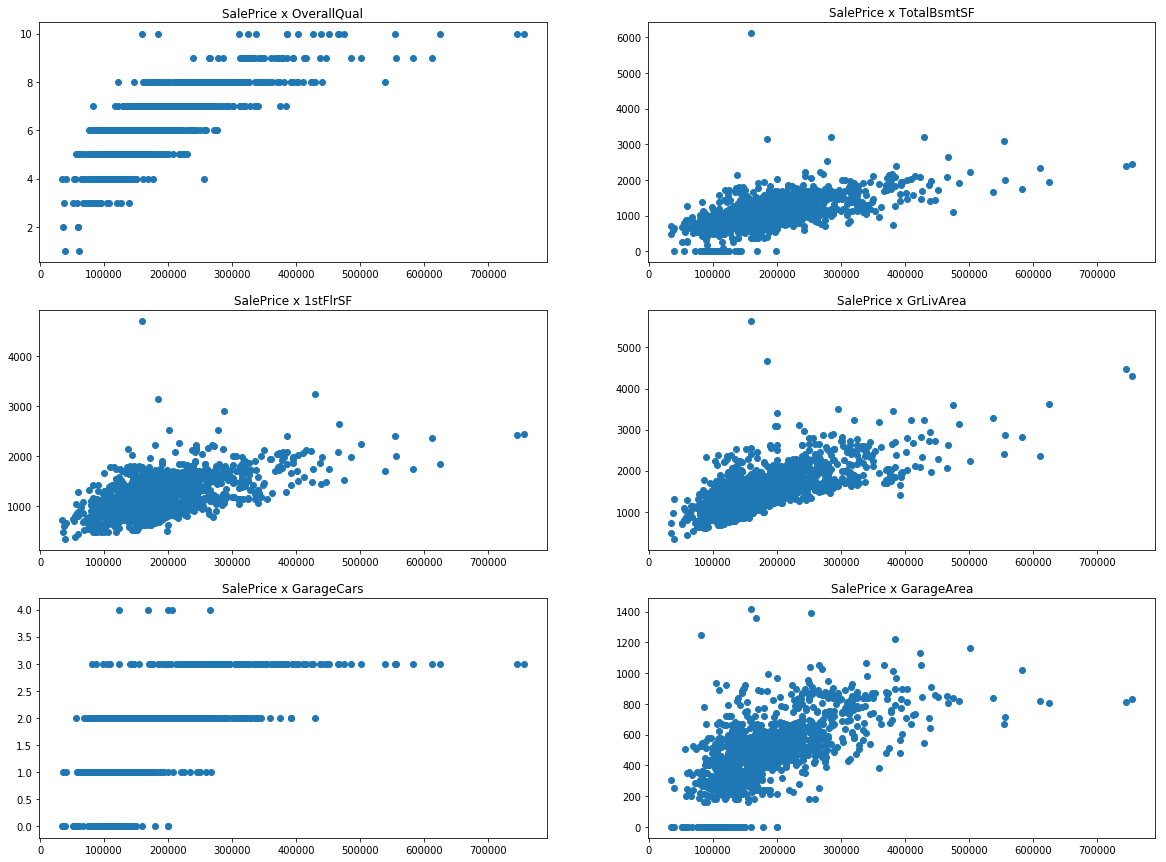

In [52]:
colunas = list(temp.columns)
colunas.remove('SalePrice')

plt.subplots(figsize=(20,15))
for n, coluna in enumerate(colunas):
    plt.subplot(3,2,n+1)
    plt.title("SalePrice x " + coluna)
    plt.scatter(x=temp['SalePrice'], y=temp[coluna])
    
plt.show()

In [ ]:
plt.subplot(321)
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322)
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, y, s=80, c=z, marker=verts)

plt.subplot(324)
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325)
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326)
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()